In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crimes.csv')

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [4]:
df.dtypes

DR_NO            int64
Date Rptd       object
DATE OCC        object
TIME OCC         int64
AREA NAME       object
Crm Cd Desc     object
Vict Age         int64
Vict Sex        object
Vict Descent    object
Weapon Desc     object
Status Desc     object
LOCATION        object
dtype: object

In [5]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

set_victGenderDict={
    "M":'Male',
    "F":'Female',
    "X":'Unknown',
    "H":'Unknown'
}

for key in set_victGenderDict:
    df['Vict Sex'] = df['Vict Sex'].replace(key,set_victGenderDict[key])

set_victEthnicDict={
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "US Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian",    
    "-": "Unknown",
}

for key in set_victEthnicDict:
    df['Vict Descent'] = df['Vict Descent'].replace(key,set_victEthnicDict[key])
    

<Axes: xlabel='Vict Sex', ylabel='count'>

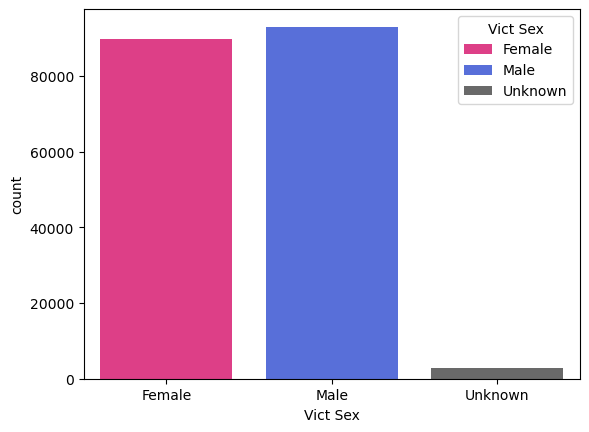

In [6]:
genderClr = {'Male':'#4361EE','Female':'#F72585','Unknown':'dimgray'}
sns.countplot(data=df,x='Vict Sex',hue='Vict Sex',palette=genderClr)

In [7]:
genderCount = df['Vict Sex'].value_counts().reset_index()
genderCount.columns = ['Victim Sex','No. of Victims']

genderCount

,Victim Sex,No. of Victims
0,Male,93008
1,Female,89854
2,Unknown,2842


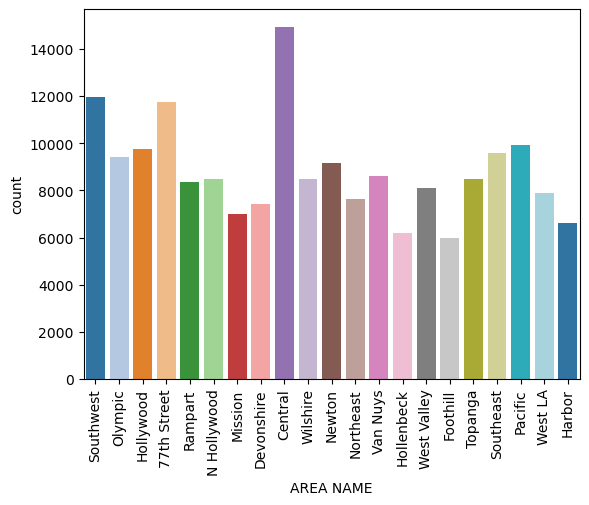

In [8]:
sns.countplot(data=df,x='AREA NAME',hue='AREA NAME',palette=sns.color_palette("tab20", 21))
plt.xticks(rotation=90)
plt.show()

In [9]:
areaCount = df['AREA NAME'].value_counts().reset_index()
areaCount.columns = ['Area Name','No. of Crimes']

areaCount

,Area Name,No. of Crimes
0,Central,14944
1,Southwest,11945
2,77th Street,11739
3,Pacific,9923
4,Hollywood,9762
5,Southeast,9571
6,Olympic,9414
7,Newton,9152
8,Van Nuys,8621
9,N Hollywood,8502


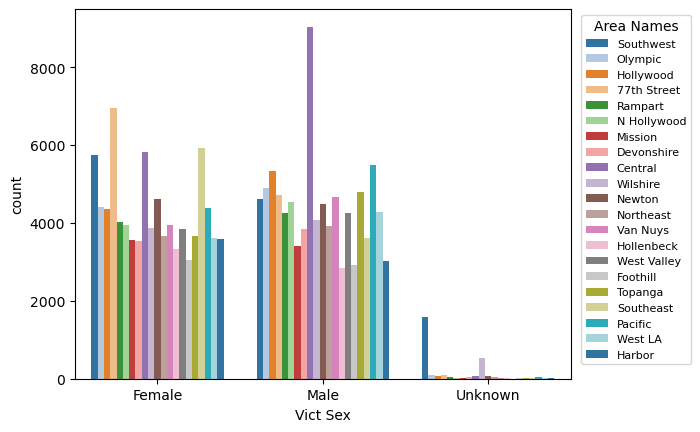

In [10]:
sns.countplot(data=df,x='Vict Sex',hue='AREA NAME',palette=sns.color_palette("tab20", 21))

plt.legend(title="Area Names",bbox_to_anchor=(1.01, 1.0), loc='upper left',fontsize=8)

In [11]:
areaGenderCount = df.groupby(['Vict Sex','AREA NAME'])['Vict Sex'].count()

areaGenderDF = pd.DataFrame(
    { 
        "Area Name":areaGenderCount['Female'].index,
        "Male":areaGenderCount['Male'].values,
        "Female":areaGenderCount['Female'].values,
        "Unknown":areaGenderCount['Unknown'].values
    } )

areaGenderDF

,Area Name,Male,Female,Unknown
0,77th Street,4707,6941,91
1,Central,9041,5830,71
2,Devonshire,3834,3543,34
3,Foothill,2910,3062,9
4,Harbor,3021,3579,18
5,Hollenbeck,2840,3339,14
6,Hollywood,5331,4365,66
7,Mission,3413,3568,9
8,N Hollywood,4534,3944,23
9,Newton,4478,4608,66


In [12]:
df['Hour'] = df['TIME OCC'].apply(lambda t: t/100)
df['Hour'] = df['Hour'].astype(int)

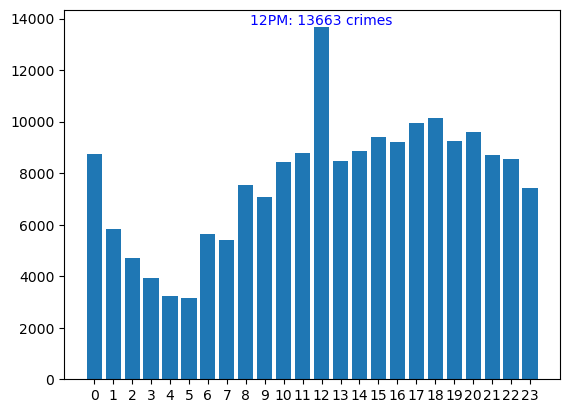

In [13]:
hourCounts = df['Hour'].value_counts().reset_index()
hourCounts.columns = ['Hour','No. of Crimes']

plt.bar(hourCounts['Hour'],hourCounts['No. of Crimes'])
plt.xticks(list(range(24)),list(map(lambda t: str(t),list(range(24)))))

plt.text(hourCounts['Hour'][0],hourCounts['No. of Crimes'][0], f'{12}PM: {hourCounts['No. of Crimes'][0]} crimes', ha='center', va='bottom', fontsize=10, color='blue')

plt.show()

In [14]:
hourCounts

,Hour,No. of Crimes
0,12,13663
1,18,10125
2,17,9964
3,20,9579
4,15,9393
5,19,9262
6,16,9224
7,14,8872
8,11,8787
9,0,8728


In [15]:
dateCount = df.loc[df['DATE OCC']>'2022-04-01','DATE OCC'].value_counts(sort=True,ascending=False).reset_index()
dateCount.columns = ['Date','No. of Crimes']
dateCount.head(10)

,Date,No. of Crimes
0,2022-12-02,935
1,2023-02-02,849
2,2022-10-01,838
3,2022-12-01,828
4,2023-02-01,810
5,2023-02-03,802
6,2023-01-01,786
7,2022-06-01,780
8,2022-06-02,773
9,2022-09-01,765


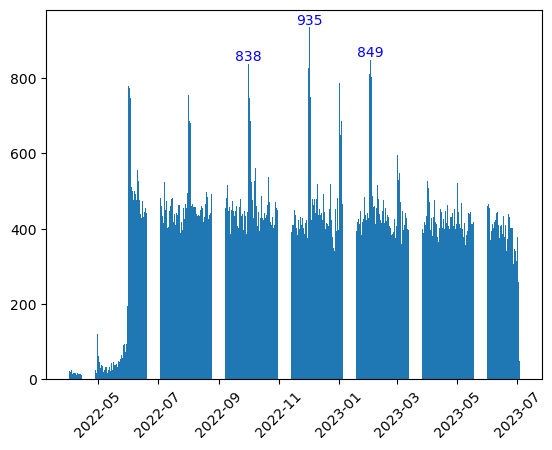

In [16]:
plt.bar(dateCount['Date'],dateCount['No. of Crimes'])
plt.xticks(rotation=45)

top3_date = dateCount.head(3)
for row in top3_date.iterrows():
    plt.text(row[1]['Date'], row[1]['No. of Crimes'], f'{row[1]["No. of Crimes"]}', ha='center', va='bottom', fontsize=10, color='blue')
    
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Black'),
  Text(1, 0, 'Hispanic/Latin/Mexican'),
  Text(2, 0, 'White'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Korean'),
  Text(6, 0, 'Vietnamese'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Other Asian'),
  Text(9, 0, 'Filipino'),
  Text(10, 0, 'Japanese'),
  Text(11, 0, 'Pacific Islander'),
  Text(12, 0, 'US Indian/Alaskan Native'),
  Text(13, 0, 'Samoan'),
  Text(14, 0, 'Asian Indian'),
  Text(15, 0, 'Hawaiian'),
  Text(16, 0, 'Laotian'),
  Text(17, 0, 'Guamanian'),
  Text(18, 0, 'Cambodian')])

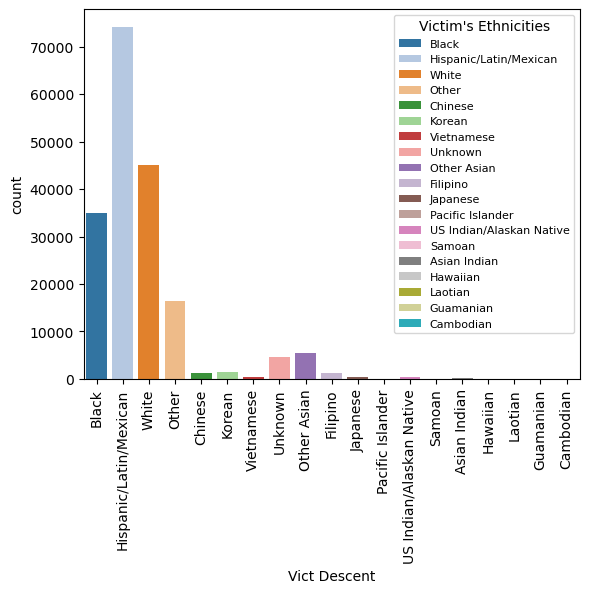

In [17]:
sns.countplot(data=df,x='Vict Descent',hue='Vict Descent',palette=sns.color_palette("tab20", 19))
plt.legend(title="Victim's Ethnicities", loc='upper right',fontsize=8)

plt.xticks(rotation=90)

In [18]:
df['Vict Descent'].value_counts()

Vict Descent
Hispanic/Latin/Mexican      74128
White                       44985
Black                       34931
Other                       16331
Other Asian                  5519
Unknown                      4549
Korean                       1389
Filipino                     1228
Chinese                      1210
Japanese                      433
Vietnamese                    327
US Indian/Alaskan Native      322
Asian Indian                  145
Pacific Islander               83
Hawaiian                       54
Cambodian                      21
Laotian                        20
Samoan                         16
Guamanian                      14
Name: count, dtype: int64

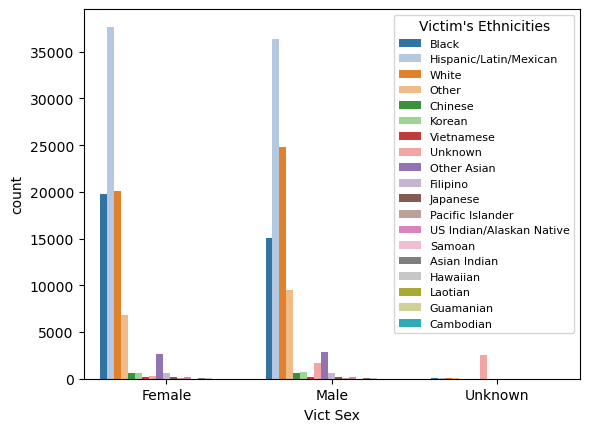

In [19]:
sns.countplot(data=df,x='Vict Sex',hue='Vict Descent',palette=sns.color_palette("tab20", 19))

plt.legend(title="Victim's Ethnicities", loc='upper right',fontsize=8)

In [20]:
ethGenderCount = df.groupby(['Vict Sex','Vict Descent'])['Vict Sex'].count().unstack(fill_value=0).stack()

ethGenderDF = pd.DataFrame(
    { 
        "Ethnicity":ethGenderCount['Female'].index,
        "Male":ethGenderCount['Male'].values,
        "Female":ethGenderCount['Female'].values,
        "Unknown":ethGenderCount['Unknown'].values,
    } )

ethGenderDF

,Ethnicity,Male,Female,Unknown
0,Asian Indian,90,54,1
1,Black,15110,19762,58
2,Cambodian,10,11,0
3,Chinese,612,592,6
4,Filipino,586,621,21
5,Guamanian,7,7,0
6,Hawaiian,28,26,0
7,Hispanic/Latin/Mexican,36375,37683,69
8,Japanese,221,211,1
9,Korean,768,618,3
